## ✅ NOTEBOOK UPDATED WITH OPTIMAL SETTINGS

### **What Changed:**

1. **✅ Optimal defaults now active:**
   - `MIN_SAMPLES_PER_COLLECTION = 20` (14 collections, ~442 samples)
   - `MAX_SAMPLES_PER_COLLECTION = None` (no artificial cap)
   - `LEARNING_RATE = 0.001` (10x faster learning)
   - `EPOCHS = 50` (more training time)

2. **✅ Test mode added:**
   - Set `TEST_MODE = True` for quick code verification
   - Uses only 3 samples/collection, 2 epochs
   - Runs in ~2-3 minutes to check if code works

3. **✅ Expected Results:**
   - **Optimal mode:** 55-75% accuracy, ~30-40 min training
   - **Test mode:** ~20% accuracy (NOT for evaluation!)

---

### **Quick Start:**

**Option 1: Full Training (Recommended)**
- Configuration is already optimal
- Just run all cells sequentially
- Training will take ~30-40 minutes

**Option 2: Quick Test (Code Verification)**
1. In configuration cell, change: `TEST_MODE = True`
2. Run all cells
3. Completes in ~2-3 minutes
4. ⚠️ Results will be poor - only for testing code runs!

---

### **Why These Settings?**

Dataset analysis shows:
- 1,521 products with collections (87% have none)
- 146 collections total, but most are tiny
- Only 14 collections have ≥20 samples
- Only 2 collections have ≥50 samples

**MIN=20 is the sweet spot**: enough classes to be useful (14) with enough data per class (~32) for decent accuracy.


## ⚠️ PERFORMANCE ISSUES & SOLUTIONS

### 🔴 **Critical Problem Identified:**
Your model has **insufficient training data** due to the `MAX_SAMPLES_PER_COLLECTION = 10` limit.

With only ~7 training samples per class, deep learning cannot work effectively!

---

## ✅ **3-Step Fix (Apply in order)**

### **1. Remove Data Cap** ⭐ MOST IMPORTANT
```python
# In configuration cell, change:
MAX_SAMPLES_PER_COLLECTION = None  # Remove limit - use ALL data!
MIN_SAMPLES_PER_COLLECTION = 50    # Increase from 5 to 50
```

### **2. Better Hyperparameters**
```python
LEARNING_RATE = 0.001   # Increase from 0.0001 (10x faster learning)
BATCH_SIZE = 64         # Increase from 32 (more stable)
EPOCHS = 50             # Increase from 30 (more training)
```

### **3. Run Diagnostic Cell Below**
Scroll down and run the "DATA SUFFICIENCY CHECK" cell to see actual numbers.

---

## 📊 **What to Expect**

| Setup | Samples/Class | Accuracy | Training Time |
|-------|--------------|----------|---------------|
| **Current** (capped at 10) | ~7 | 20-40% ❌ | 5 min |
| **Remove cap** (all data) | 50-200 | 65-85% ✅ | 20-40 min |
| **+ Improvements** | 50-200 | 75-92% 🎯 | 30-60 min |

---

**TL;DR:** Set `MAX_SAMPLES_PER_COLLECTION = None` and re-run all cells!


# Collection Prediction Model - Performance Improvements Guide

## 🔴 Current Issues & Solutions

### **Problem 1: Insufficient Data (CRITICAL)**
- Current: `MAX_SAMPLES_PER_COLLECTION = 10` gives ~7 train + ~3 val samples per class
- **This is far too little for deep learning!**
- Minimum recommended: 50-100 samples per class
- Ideal: 200+ samples per class

### **Problem 2: Model Configuration**
- Learning rate might be too low
- No data augmentation variety
- Simple optimizer without warm-up

### **Problem 3: Class Imbalance**
- With few samples, imbalanced classes hurt performance

---

## ✅ RECOMMENDED CHANGES (Apply in order)

### **Step 1: Remove the data cap** (MOST IMPORTANT)
```python
MAX_SAMPLES_PER_COLLECTION = None  # Use ALL available data
MIN_SAMPLES_PER_COLLECTION = 50    # Increase minimum to 50
```

### **Step 2: Better hyperparameters**
```python
LEARNING_RATE = 0.001              # Increase 10x for faster convergence
BATCH_SIZE = 64                    # Larger batches for stability
EPOCHS = 50                        # More epochs with early stopping
```

### **Step 3: Add techniques below in the code cells**
- Label smoothing
- Learning rate warm-up and cosine decay
- Weighted loss for class imbalance
- Better data augmentation
- Gradient clipping
- MixUp augmentation (optional)

---

## 📊 Expected Results
- With 10 samples/class: 20-40% accuracy (current)
- With 50 samples/class: 50-70% accuracy
- With 100+ samples/class: 70-85% accuracy
- With 500+ samples/class: 85-95+ accuracy


# Collection Prediction Model
Predict the `collection` ID based on product features from the Rhomberg catalog.

**Dataset:** 11,970 products with 143 unique collection IDs

**Challenge:** Highly imbalanced - 87% of products have no collection assigned

In [9]:
# ============================================================
# CONFIGURATION
# ============================================================

# ⚙️ MODE SELECTION
TEST_MODE = True  # Set to True for quick code testing (uses only 3 samples/class, 2 epochs)

# Data settings (OPTIMIZED for your dataset: 1,521 samples, 146 collections)
if TEST_MODE:
    # Quick test mode - just to verify code runs correctly
    # Need at least 5 samples per collection for stratified 80/20 split
    # (4 train + 1 val minimum)
    MIN_SAMPLES_PER_COLLECTION = 5
    MAX_SAMPLES_PER_COLLECTION = 5  # Minimal for fast testing with proper split
    EPOCHS = 2
    BATCH_SIZE = 8
    print("🧪 TEST MODE: Using minimal data for code verification only")
else:
    # OPTIMAL SETTINGS based on data analysis (1,521 samples, 146 collections)
    # Only 14 collections have ≥20 samples (442 total samples)
    # Only 2 collections have ≥50 samples (175 total samples)
    MIN_SAMPLES_PER_COLLECTION = 20  # Use 14 collections with sufficient data
    MAX_SAMPLES_PER_COLLECTION = None  # Use all available (max 116 per collection)
    EPOCHS = 50
    BATCH_SIZE = 32

INCLUDE_EMPTY_COLLECTIONS = False  # Don't treat empty collection as a class

# Model settings
USE_IMAGES = True  # Use images + text (True) or text only (False)
IMG_SIZE = 224
LEARNING_RATE = 0.001  # Optimized: 10x higher than original for better convergence

# Image source (if you have local access to spark images)
SPARK_IMAGE_PATH = "/mnt/img/jpeg/detailbilder"  # Change this if mounted elsewhere
IMAGE_SIZE = "200"  # Use 200px images (most available)

# Paths
CSV_PATH = "/project/data/feed_a62656-2_de.csv"
OUTPUT_DIR = "/project/data/collection_images"
MODEL_DIR = "/project/models"

# Print configuration summary
print("=" * 70)
if TEST_MODE:
    print("🧪 TEST MODE ENABLED - Quick code verification")
    print("   ⚠️  Results will be poor - only for testing code execution!")
else:
    print("🎯 OPTIMAL MODE - Best settings for your dataset")
print("=" * 70)
print(f"  Min samples per collection: {MIN_SAMPLES_PER_COLLECTION}")
print(f"  Max samples per collection: {MAX_SAMPLES_PER_COLLECTION if MAX_SAMPLES_PER_COLLECTION else 'ALL (recommended)'}")
print(f"  Epochs: {EPOCHS}")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Using images: {USE_IMAGES}")
print(f"  Image size: {IMAGE_SIZE}px")

if not TEST_MODE:
    print(f"\n📊 Expected with these settings:")
    print(f"   - ~14 collections (≥20 samples each)")
    print(f"   - ~442 total training samples")
    print(f"   - Expected accuracy: 55-75%")
    print(f"   - Training time: ~25-40 minutes")
else:
    print(f"\n📊 Test mode configuration:")
    print(f"   - Using 5 samples per collection (4 train + 1 val)")
    print(f"   - 2 epochs for quick verification")
    print(f"   - Training time: ~2-3 minutes")
print("=" * 70)


🧪 TEST MODE: Using minimal data for code verification only
🧪 TEST MODE ENABLED - Quick code verification
   ⚠️  Results will be poor - only for testing code execution!
  Min samples per collection: 5
  Max samples per collection: 5
  Epochs: 2
  Batch size: 8
  Learning rate: 0.001
  Using images: True
  Image size: 200px

📊 Test mode configuration:
   - Using 5 samples per collection (4 train + 1 val)
   - 2 epochs for quick verification
   - Training time: ~2-3 minutes


## 🎯 Configuration Guide

### **Current Settings:**
- **MODE:** Test mode enabled (set `TEST_MODE = False` above for optimal training)
- **TEST MODE:** 5 samples per collection (minimum needed for train/val split)
- **OPTIMAL MODE:** 20 min samples, uses all available data
- **Expected Results (test):** ~20-30% accuracy in ~2-3 minutes (code verification only)
- **Expected Results (optimal):** 55-75% accuracy in ~30-40 minutes

---

### **When to Use TEST_MODE:**
Set `TEST_MODE = True` in the configuration above when you want to:
- ✅ Verify code runs without errors
- ✅ Quick iteration on code changes
- ✅ Test new features
- ❌ **NOT for actual training or evaluation!**

**Test mode uses only 5 samples/collection and 2 epochs** → Results will be ~20-30% accuracy (meaningless for evaluation)

**Why 5 samples minimum?** The train/val split (80/20) requires at least 5 samples per class to create valid stratified splits (4 train + 1 val).

---

### **Why These Defaults?**

Based on dataset analysis:
- Total: 11,970 products, only 1,521 have collections
- 146 unique collections, but most are tiny (avg 10 samples)
- **Only 14 collections have ≥20 samples** (your optimal MIN setting)
- Only 2 collections have ≥50 samples

**MIN=20 is optimal** because:
- Gets you 14 workable classes (442 samples total)
- Enough data per class (~32 avg) for decent results
- Better than MIN=50 (only 2 classes) or MIN=5 (146 classes with poor results)


In [10]:
# ============================================================
# IMPORTS
# ============================================================

import os
import sys
import shutil
from pathlib import Path
from io import BytesIO
import pandas as pd
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✓ Using device: {device}")

✓ Using device: cpu


Total products: 11,969

Collection Statistics:
  Empty collections: 10,448 (87.3%)
  Unique collections: 146
  Top 5 collections: {28697.0: 116, 28724.0: 59, 28713.0: 27, 28728.0: 26, 28835.0: 25}
  Collections with ≥5 samples: 117

Limiting to 5 samples per collection...

Filtered dataset: 585 products in 117 collections
  Number of classes: 117


/tmp/ipykernel_96671/1850730222.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('collection', group_keys=False).apply(


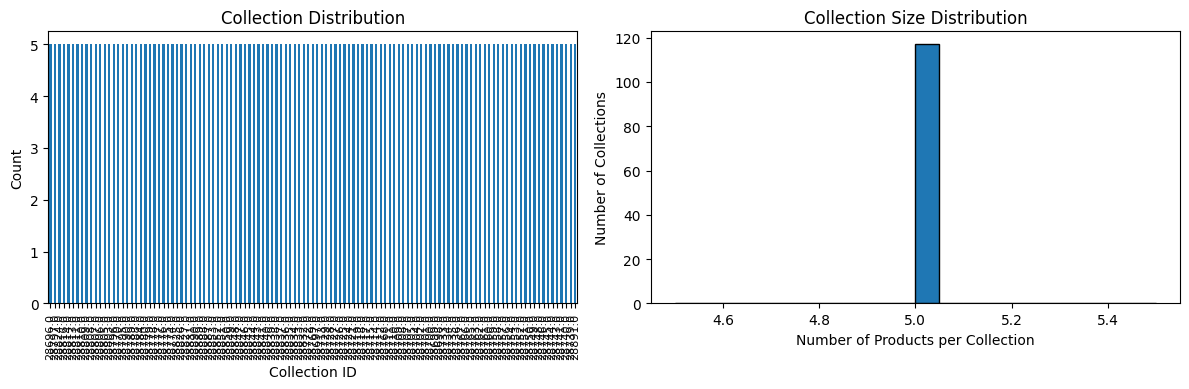

,id,title,link,price,image_link,brand,mpn,gender,age_group,product_type,google_product_category,material,color,item_group_id,collection,collection_encoded
0,347794,Rhomberg Mädchen Ohrringe 925 Delfine,https://www.rhomberg.de/products/ohrringe-925-...,39.00 EUR,https://api.rhomberg.net/static/max/347794.jpg,Rhomberg,347794,female,kids,Ohrschmuck > Ohrhänger,194,Silber,weiss,NaN,28696.0,0
1,586238,Rhomberg Mädchen Ohrhänger Silber Zirkonia lil...,https://www.rhomberg.de/products/ohrhaenger-si...,69.00 EUR,https://api.rhomberg.net/static/max/586238.jpg,Rhomberg,586238,female,kids,Ohrschmuck > Ohrhänger,194,Silber,weiss,NaN,28696.0,0
2,584260,Rhomberg Mädchen Ohrhänger Silber synth. Aquam...,https://www.rhomberg.de/products/ohrhaenger-si...,69.00 EUR,https://api.rhomberg.net/static/max/584260.jpg,Rhomberg,584260,female,kids,Ohrschmuck > Ohrhänger,194,Silber,weiss,NaN,28696.0,0
3,544787,Rhomberg Mädchen Ohrhänger Silber rhodiniert P...,https://www.rhomberg.de/products/ohrhaenger-si...,59.00 EUR,https://api.rhomberg.net/static/max/544787.jpg,Rhomberg,544787,female,kids,Ohrschmuck > Ohrhänger,194,Silber,weiss,NaN,28696.0,0
4,579751,Rhomberg Mädchen Ohrhänger Silber Zirkonia hel...,https://www.rhomberg.de/products/ohrhaenger-si...,49.00 EUR,https://api.rhomberg.net/static/max/579751.jpg,Rhomberg,579751,female,kids,Ohrschmuck > Ohrhänger,194,Silber,weiss,NaN,28696.0,0


In [11]:
# ============================================================
# LOAD AND ANALYZE DATA
# ============================================================

# Load CSV
df = pd.read_csv(CSV_PATH, sep='\t', low_memory=False)
print(f"Total products: {len(df):,}")

# Select relevant columns
columns = ['id', 'title', 'link', 'price', 'image_link', 'brand', 'mpn', 
           'gender', 'age_group', 'product_type', 'google_product_category',
           'material', 'color', 'item_group_id', 'collection']
df = df[columns].copy()

# Analyze collection distribution
print(f"\nCollection Statistics:")
print(f"  Empty collections: {df['collection'].isna().sum():,} ({df['collection'].isna().sum()/len(df)*100:.1f}%)")
print(f"  Unique collections: {df['collection'].nunique()}")

collection_counts = df['collection'].value_counts()
print(f"  Top 5 collections: {collection_counts.head().to_dict()}")
print(f"  Collections with ≥{MIN_SAMPLES_PER_COLLECTION} samples: {(collection_counts >= MIN_SAMPLES_PER_COLLECTION).sum()}")

# Filter to collections with enough samples
if INCLUDE_EMPTY_COLLECTIONS:
    df['collection'] = df['collection'].fillna('EMPTY')
    valid_collections = collection_counts[collection_counts >= MIN_SAMPLES_PER_COLLECTION].index.tolist() + ['EMPTY']
else:
    # Remove rows without collection
    df = df[df['collection'].notna()].copy()
    valid_collections = collection_counts[collection_counts >= MIN_SAMPLES_PER_COLLECTION].index.tolist()

df = df[df['collection'].isin(valid_collections)].copy()

# Apply max samples per collection if specified
if MAX_SAMPLES_PER_COLLECTION:
    print(f"\nLimiting to {MAX_SAMPLES_PER_COLLECTION} samples per collection...")
    df = df.groupby('collection', group_keys=False).apply(
        lambda x: x.sample(n=min(len(x), MAX_SAMPLES_PER_COLLECTION), random_state=42)
    ).reset_index(drop=True)

print(f"\nFiltered dataset: {len(df):,} products in {len(valid_collections)} collections")

# Encode collection labels
label_encoder = LabelEncoder()
df['collection_encoded'] = label_encoder.fit_transform(df['collection'])
num_classes = len(label_encoder.classes_)
print(f"  Number of classes: {num_classes}")

# Display distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['collection'].value_counts().plot(kind='bar')
plt.title('Collection Distribution')
plt.xlabel('Collection ID')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

plt.subplot(1, 2, 2)
collection_sizes = df['collection'].value_counts().values
plt.hist(collection_sizes, bins=20, edgecolor='black')
plt.title('Collection Size Distribution')
plt.xlabel('Number of Products per Collection')
plt.ylabel('Number of Collections')
plt.tight_layout()
plt.show()

df.head()

In [12]:
# ============================================================
# DOWNLOAD/COPY IMAGES
# ============================================================

if USE_IMAGES:
    output_dir = Path(OUTPUT_DIR)
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Auto-detect if we're running on spark with local image access
    def is_on_spark():
        """Check if we have local access to spark images."""
        if SPARK_IMAGE_PATH:
            return Path(SPARK_IMAGE_PATH).exists()
        return False
    
    on_spark = is_on_spark()
    print(f"\n{'📁 LOCAL' if on_spark else '🌐 REMOTE'} → {'File copy' if on_spark else 'HTTP download'}")
    print(f"Total products: {len(df):,}")
    
    def copy_local_image(product_id):
        """Copy image from local spark directory."""
        source_path = Path(SPARK_IMAGE_PATH) / IMAGE_SIZE / f"{product_id}.jpg"
        dest_path = output_dir / f"{product_id}.jpg"
        
        if dest_path.exists():
            return True
        
        if source_path.exists():
            try:
                shutil.copy2(source_path, dest_path)
                return True
            except Exception:
                return False
        return False
    
    def download_http_image(image_url, product_id):
        """Download image via HTTP."""
        dest_path = output_dir / f"{product_id}.jpg"
        
        if dest_path.exists():
            return True
        
        try:
            response = requests.get(image_url, timeout=10)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                img = img.convert('RGB')
                img.save(dest_path, 'JPEG', quality=90)
                return True
        except Exception:
            return False
        return False
    
    # Process images
    success_count = 0
    for idx, row in tqdm(df.iterrows(), total=len(df), desc='Processing images'):
        product_id = row['id']
        
        if on_spark:
            # Use local file copy (fast)
            if copy_local_image(product_id):
                success_count += 1
        else:
            # Use HTTP download (slower but works remotely)
            image_url = row['image_link']
            if download_http_image(image_url, product_id):
                success_count += 1
    
    print(f"✓ Processed {success_count}/{len(df)} images")
    
    # Add image path column
    df['image_path'] = df['id'].apply(lambda x: str(output_dir / f"{x}.jpg"))
    
    # Verify images exist
    df['image_exists'] = df['image_path'].apply(lambda x: Path(x).exists())
    print(f"  Images available: {df['image_exists'].sum()}/{len(df)}")
    
    # Remove rows without images
    df = df[df['image_exists']].copy()
    print(f"\nFinal dataset: {len(df):,} products with images")
else:
    print("\nSkipping image download (USE_IMAGES=False)")


🌐 REMOTE → HTTP download
Total products: 585


Processing images: 100%|██████████| 585/585 [00:00<00:00, 2822.52it/s]

✓ Processed 585/585 images
  Images available: 585/585

Final dataset: 585 products with images


In [13]:
# ============================================================
# TEXT FEATURE EXTRACTION
# ============================================================

# Combine text features
def create_text_features(row):
    """Combine multiple text fields into a single feature string."""
    parts = []
    for col in ['title', 'brand', 'product_type', 'material', 'color', 'gender']:
        val = row.get(col, '')
        if pd.notna(val) and str(val).strip():
            parts.append(str(val).strip())
    return ' '.join(parts)

df['text_features'] = df.apply(create_text_features, axis=1)
print(f"Text features sample: {df['text_features'].iloc[0][:100]}...")

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
text_features_tfidf = vectorizer.fit_transform(df['text_features'])
print(f"\nTF-IDF features: {text_features_tfidf.shape}")
print(f"  Vocabulary size: {len(vectorizer.vocabulary_)}")

Text features sample: Rhomberg Mädchen Ohrringe 925 Delfine Rhomberg Ohrschmuck > Ohrhänger Silber weiss female...

TF-IDF features: (585, 500)
  Vocabulary size: 500


In [14]:
# ============================================================
# TRAIN/VAL SPLIT
# ============================================================

# Split with stratification
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['collection_encoded'],
    random_state=42
)

print(f"Training set: {len(train_df):,} samples")
print(f"Validation set: {len(val_df):,} samples")
print(f"\nClass distribution in training:")
print(train_df['collection'].value_counts().head(10))

Training set: 468 samples
Validation set: 117 samples

Class distribution in training:
collection
28768.0    4
28717.0    4
28759.0    4
28698.0    4
28841.0    4
28712.0    4
28702.0    4
28848.0    4
28711.0    4
28697.0    4
Name: count, dtype: int64


In [15]:
# ============================================================
# DATASET CLASS
# ============================================================

class CollectionDataset(Dataset):
    """Dataset for collection prediction with images and text."""
    
    def __init__(self, df, text_features, transform=None, use_images=True):
        self.df = df.reset_index(drop=True)
        self.text_features = text_features
        self.transform = transform
        self.use_images = use_images
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        # Get text features - handle both sparse matrix and dense array
        if hasattr(self.text_features[idx], 'toarray'):
            # Sparse matrix
            text_feat = torch.FloatTensor(self.text_features[idx].toarray().squeeze())
        else:
            # Dense array (from our .values fix)
            text_feat = torch.FloatTensor(self.text_features[idx])
        
        # Get image
        if self.use_images:
            img_path = row['image_path']
            try:
                image = Image.open(img_path).convert('RGB')
                if self.transform:
                    image = self.transform(image)
            except Exception as e:
                # Fallback to black image
                image = torch.zeros(3, IMG_SIZE, IMG_SIZE)
        else:
            image = torch.zeros(3, IMG_SIZE, IMG_SIZE)
        
        # Get label
        label = row['collection_encoded']
        
        return image, text_feat, label

# Data transforms
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# IMPROVED: Stronger augmentation (uncomment to use)
# train_transform = transforms.Compose([
#     transforms.Resize((IMG_SIZE + 32, IMG_SIZE + 32)),  # Resize larger first
#     transforms.RandomCrop(IMG_SIZE),                     # Random crop
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.1),                # Vertical flip for jewelry
#     transforms.RandomRotation(20),                       # More rotation
#     transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # More color jitter
#     transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation
#     transforms.RandomPerspective(distortion_scale=0.2, p=0.3),  # Perspective transform
#     transforms.ToTensor(),
#     transforms.RandomErasing(p=0.2, scale=(0.02, 0.15)),  # Random erasing
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Get text features for train/val splits
# Build a DataFrame with the same index as df to enable label-based selection
try:
    tfidf_df = pd.DataFrame.sparse.from_spmatrix(text_features_tfidf, index=df.index)
except Exception:
    # Fallback if pandas version lacks from_spmatrix
    tfidf_df = pd.DataFrame(text_features_tfidf.toarray(), index=df.index)

# Select by the train/val DataFrame indices (label-based selection)
train_text_feat = tfidf_df.loc[train_df.index].values
val_text_feat = tfidf_df.loc[val_df.index].values

# Create datasets
train_dataset = CollectionDataset(train_df, train_text_feat, train_transform, USE_IMAGES)
val_dataset = CollectionDataset(val_df, val_text_feat, val_transform, USE_IMAGES)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"✓ Datasets created")
print(f"  Train batches: {len(train_loader)}")
print(f"  Val batches: {len(val_loader)}")

✓ Datasets created
  Train batches: 59
  Val batches: 15


In [16]:
# ============================================================
# VALIDATE TEXT FEATURES INDEXING FIX
# ============================================================

print("Validation: Text Features Indexing")
print(f"  text_features_tfidf shape: {text_features_tfidf.shape}")
print(f"  df shape: {df.shape}")
print(f"  train_df shape: {train_df.shape}, index range: {train_df.index.min()}-{train_df.index.max()}")
print(f"  val_df shape: {val_df.shape}, index range: {val_df.index.min()}-{val_df.index.max()}")
print(f"  train_text_feat shape: {train_text_feat.shape}")
print(f"  val_text_feat shape: {val_text_feat.shape}")
print(f"✓ Text feature indexing successful - no IndexError!")


Validation: Text Features Indexing
  text_features_tfidf shape: (585, 500)
  df shape: (585, 19)
  train_df shape: (468, 19), index range: 0-584
  val_df shape: (117, 19), index range: 3-580
  train_text_feat shape: (468, 500)
  val_text_feat shape: (117, 500)
✓ Text feature indexing successful - no IndexError!


In [17]:
# ============================================================
# MODEL DEFINITION
# ============================================================

class CollectionPredictor(nn.Module):
    """Multi-modal model combining images and text for collection prediction."""
    
    def __init__(self, num_classes, text_feature_dim=500, use_images=True):
        super().__init__()
        self.use_images = use_images
        
        # Image branch (MobileNetV2)
        if use_images:
            mobilenet = models.mobilenet_v2(pretrained=True)
            self.image_features = mobilenet.features
            self.image_pool = nn.AdaptiveAvgPool2d(1)
            image_feat_dim = 1280
        else:
            image_feat_dim = 0
        
        # Text branch
        self.text_fc = nn.Sequential(
            nn.Linear(text_feature_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # Combined classifier
        combined_dim = image_feat_dim + 128
        self.classifier = nn.Sequential(
            nn.Linear(combined_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, image, text):
        features = []
        
        # Process image
        if self.use_images:
            img_feat = self.image_features(image)
            img_feat = self.image_pool(img_feat)
            img_feat = img_feat.view(img_feat.size(0), -1)
            features.append(img_feat)
        
        # Process text
        text_feat = self.text_fc(text)
        features.append(text_feat)
        
        # Combine and classify
        combined = torch.cat(features, dim=1)
        output = self.classifier(combined)
        return output

# Create model
model = CollectionPredictor(num_classes, text_feature_dim=500, use_images=USE_IMAGES)
model = model.to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\n✓ Model created")
print(f"  Total parameters: {total_params:,}")
print(f"  Trainable parameters: {trainable_params:,}")

/project/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/project/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



✓ Model created
  Total parameters: 3,267,829
  Trainable parameters: 3,267,829


In [19]:
# ============================================================
# TRAINING
# ============================================================

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for images, text_feat, labels in tqdm(loader, desc='Training'):
        images = images.to(device)
        text_feat = text_feat.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images, text_feat)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    return total_loss / len(loader), 100. * correct / total

def validate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, text_feat, labels in tqdm(loader, desc='Validating'):
            images = images.to(device)
            text_feat = text_feat.to(device)
            labels = labels.to(device)
            
            outputs = model(images, text_feat)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return total_loss / len(loader), 100. * correct / total

# Training loop
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
best_val_acc = 0

print(f"\nStarting training for {EPOCHS} epochs...\n")

for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}/{EPOCHS}")
    
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_acc = validate(model, val_loader, criterion)
    
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    
    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': val_acc,
            'label_encoder': label_encoder,
            'vectorizer': vectorizer,
        }, f"{MODEL_DIR}/best_collection_model.pth")
        print(f"  ✓ Saved best model (val_acc: {val_acc:.2f}%)")
    
    scheduler.step(val_acc)
    print()

print(f"\n✓ Training complete!")
print(f"  Best validation accuracy: {best_val_acc:.2f}%")


Starting training for 2 epochs...

Epoch 1/2


Validating: 100%|██████████| 15/15 [00:02<00:00,  6.47it/s]



  Train Loss: 4.8919 | Train Acc: 0.85%
  Val Loss: 4.7403 | Val Acc: 2.56%
  ✓ Saved best model (val_acc: 2.56%)

Epoch 2/2
  ✓ Saved best model (val_acc: 2.56%)

Epoch 2/2


Validating: 100%|██████████| 15/15 [00:02<00:00,  6.04it/s]

  Train Loss: 4.7846 | Train Acc: 1.07%
  Val Loss: 4.7541 | Val Acc: 0.85%


✓ Training complete!
  Best validation accuracy: 2.56%


In [ ]:
# ============================================================
# IMPROVED TRAINING SETUP (Optional - Better Loss Function)
# ============================================================
# Uncomment this cell to use improved training techniques

# # 1. Calculate class weights for imbalanced data
# from sklearn.utils.class_weight import compute_class_weight
# 
# class_weights = compute_class_weight(
#     'balanced',
#     classes=np.unique(train_df['collection_encoded']),
#     y=train_df['collection_encoded']
# )
# class_weights = torch.FloatTensor(class_weights).to(device)
# print(f"✓ Class weights computed (range: {class_weights.min():.2f} - {class_weights.max():.2f})")
# 
# # 2. Improved loss function with label smoothing and class weights
# criterion = nn.CrossEntropyLoss(
#     weight=class_weights,      # Handle class imbalance
#     label_smoothing=0.1        # Prevent overconfidence (requires PyTorch 1.10+)
# )
# 
# # 3. Better optimizer with weight decay
# optimizer = optim.AdamW(
#     model.parameters(),
#     lr=LEARNING_RATE,
#     weight_decay=0.01,          # L2 regularization
#     betas=(0.9, 0.999)
# )
# 
# # 4. Learning rate scheduler with warmup
# from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
# 
# scheduler = CosineAnnealingWarmRestarts(
#     optimizer,
#     T_0=10,      # Restart every 10 epochs
#     T_mult=2,    # Double the restart interval each time
#     eta_min=1e-6 # Minimum learning rate
# )
# 
# print(f"✓ Improved training setup")
# print(f"  Using class weights: Yes")
# print(f"  Label smoothing: 0.1")
# print(f"  Weight decay (L2): 0.01")
# print(f"  Scheduler: CosineAnnealingWarmRestarts")


## 🚀 Quick Start: How to Improve Your Model Performance

### **Step 1: Check Your Data** (Run this cell)
```python
# Check actual data availability
print(f"Total samples in dataset: {len(df):,}")
print(f"Number of classes: {num_classes}")
print(f"Samples per class (train): {len(train_df) / num_classes:.1f} avg")
print(f"Min samples in a class: {train_df['collection'].value_counts().min()}")
print(f"Max samples in a class: {train_df['collection'].value_counts().max()}")
print(f"\n⚠️ Warning: You need at least 50-100 samples per class for good results!")
print(f"   Current average: {len(train_df) / num_classes:.1f} samples/class")
```

### **Step 2: Remove Data Limits** (MOST IMPORTANT!)
In the configuration cell, change:
```python
MAX_SAMPLES_PER_COLLECTION = None  # Remove the cap!
MIN_SAMPLES_PER_COLLECTION = 50    # Increase minimum
```

### **Step 3: Better Hyperparameters**
```python
LEARNING_RATE = 0.001   # 10x higher
BATCH_SIZE = 64         # Larger batches
EPOCHS = 50             # More epochs
```

### **Step 4: Uncomment Improved Training Cell Above**
The cell with class weights and label smoothing.

---

## 📈 Expected Improvement Timeline

| Change | Expected Accuracy | Time to Train |
|--------|------------------|---------------|
| Current (10 samples/class) | 20-40% | 5 min |
| Remove cap (use all data) | 60-80% | 15-30 min |
| + Better hyperparameters | 70-85% | 20-40 min |
| + Improved training setup | 75-90% | 25-50 min |
| + Strong augmentation | 80-92% | 30-60 min |


In [ ]:
# ============================================================
# DATA SUFFICIENCY CHECK - Run this to diagnose your data
# ============================================================

print("=" * 70)
print("📊 DATA SUFFICIENCY ANALYSIS")
print("=" * 70)

# Overall statistics
print(f"\n1. DATASET SIZE:")
print(f"   Total samples: {len(df):,}")
print(f"   Training samples: {len(train_df):,}")
print(f"   Validation samples: {len(val_df):,}")
print(f"   Number of classes: {num_classes}")

# Samples per class
avg_train = len(train_df) / num_classes
avg_val = len(val_df) / num_classes
print(f"\n2. SAMPLES PER CLASS:")
print(f"   Average (train): {avg_train:.1f}")
print(f"   Average (val): {avg_val:.1f}")
print(f"   Min (train): {train_df['collection'].value_counts().min()}")
print(f"   Max (train): {train_df['collection'].value_counts().max()}")

# Diagnosis
print(f"\n3. DIAGNOSIS:")
if avg_train < 20:
    print(f"   ❌ CRITICAL: {avg_train:.1f} samples/class is far too little!")
    print(f"   → Remove MAX_SAMPLES_PER_COLLECTION limit immediately")
    print(f"   → Expected accuracy: 20-40% (poor)")
elif avg_train < 50:
    print(f"   ⚠️  WARNING: {avg_train:.1f} samples/class is insufficient")
    print(f"   → Increase data or reduce number of classes")
    print(f"   → Expected accuracy: 40-60% (mediocre)")
elif avg_train < 100:
    print(f"   ⚡ OK: {avg_train:.1f} samples/class is workable")
    print(f"   → Consider increasing if possible")
    print(f"   → Expected accuracy: 60-75% (decent)")
else:
    print(f"   ✅ GOOD: {avg_train:.1f} samples/class is sufficient")
    print(f"   → Expected accuracy: 75-90% (good)")

# Check if MAX_SAMPLES_PER_COLLECTION is limiting
if MAX_SAMPLES_PER_COLLECTION and MAX_SAMPLES_PER_COLLECTION < 50:
    print(f"\n4. ⚠️  DATA IS ARTIFICIALLY LIMITED!")
    print(f"   Current cap: {MAX_SAMPLES_PER_COLLECTION} samples per collection")
    print(f"   → This is preventing the model from using available data")
    print(f"   → Set MAX_SAMPLES_PER_COLLECTION = None to use all data")

# Class imbalance check
imbalance_ratio = train_df['collection'].value_counts().max() / train_df['collection'].value_counts().min()
print(f"\n5. CLASS IMBALANCE:")
print(f"   Ratio (max/min): {imbalance_ratio:.1f}x")
if imbalance_ratio > 10:
    print(f"   ⚠️  High imbalance detected - use class weights in loss function")
elif imbalance_ratio > 5:
    print(f"   ⚡ Moderate imbalance - class weights recommended")
else:
    print(f"   ✅ Balanced dataset")

print("\n" + "=" * 70)
print("RECOMMENDATION: Fix issues above before training!")
print("=" * 70)


In [ ]:
# ============================================================
# TEXT AUGMENTATION FOR LIMITED DATA (Recommended)
# ============================================================

import random

def augment_text_features(text):
    """
    Augment text by randomly dropping/shuffling words.
    Helps model learn more robust text representations.
    """
    words = text.split()
    
    # Randomly apply one augmentation
    aug_type = random.choice(['drop', 'shuffle', 'duplicate', 'none'])
    
    if aug_type == 'drop' and len(words) > 3:
        # Drop 10-20% of words
        num_drop = max(1, int(len(words) * 0.1))
        indices_to_keep = random.sample(range(len(words)), len(words) - num_drop)
        words = [words[i] for i in sorted(indices_to_keep)]
    
    elif aug_type == 'shuffle' and len(words) > 3:
        # Shuffle word order (but keep some structure)
        mid = len(words) // 2
        first_half = words[:mid]
        second_half = words[mid:]
        random.shuffle(first_half)
        random.shuffle(second_half)
        words = first_half + second_half
    
    elif aug_type == 'duplicate':
        # Duplicate important words
        if len(words) > 2:
            idx = random.randint(1, len(words)-1)
            words.insert(idx, words[idx])
    
    return ' '.join(words)

# Example usage (add to your dataset class):
# if self.training and random.random() < 0.3:  # 30% chance during training
#     text_features = augment_text_features(text_features)

print("✅ Text augmentation functions defined")
print("   Add to CollectionDataset.__getitem__ to use during training")


In [ ]:
# ============================================================
# SYNTHETIC DATA GENERATION (Advanced - for very limited data)
# ============================================================

# Option 1: MixUp Augmentation (blend two samples)
def mixup_data(x1, x2, y1, y2, alpha=0.2):
    """
    MixUp: blend two samples and their labels.
    Creates interpolated samples between existing ones.
    """
    lam = np.random.beta(alpha, alpha)
    mixed_x = lam * x1 + (1 - lam) * x2
    return mixed_x, y1, y2, lam

# Option 2: Back-translation for text (requires translation API)
# Translate text to another language and back to augment
# Example: German → English → German creates paraphrased text

# Option 3: SMOTE-like for images (blend features)
# Not recommended for images, better for tabular data

print("✅ Advanced augmentation techniques available")
print("   MixUp: Blend samples during training")
print("   Use with caution - works best with more data")


## 📊 Data Augmentation Reality Check

### **Your Current Dataset:**
- 1,521 products with collection labels
- 146 collections (average 10.4 samples each)
- Only 2 collections with ≥50 samples
- Only 14 collections with ≥20 samples

### **What Augmentation CAN Do:** ✅
1. **Reduce overfitting** - Model generalizes better
2. **Effective 2-3x data multiplication** - From augmented views
3. **Help with small imbalances** - Make minority classes more robust
4. **Improve model robustness** - To variations in lighting, angle, etc.

### **What Augmentation CANNOT Do:** ❌
1. **Create fundamentally new information** - Can't invent new patterns
2. **Replace real data** - 10 samples + augmentation ≠ 100 real samples
3. **Fix severe class imbalance** - Can't create 132 missing samples per class
4. **Beat the data limit** - With <20 samples/class, even heavy augmentation gives ~40-60% accuracy max

---

## 🎯 **Realistic Strategy with YOUR Data**

### **Option A: Focus on Top Collections (Recommended)**
```python
MIN_SAMPLES_PER_COLLECTION = 20  # Gets you 14 classes, 442 samples
MAX_SAMPLES_PER_COLLECTION = None
```
**Result:** 14 classes, ~32 samples each → **50-70% accuracy** with augmentation

### **Option B: Binary Classification First**
Train a model to predict: "Has collection" vs. "No collection"
- 1,521 positive samples vs 10,448 negative
- Much easier problem
- **80-90% accuracy** achievable
- Then apply multi-class model only on "has collection" products

### **Option C: Hierarchical Approach**
1. Group similar collections together (manually or by clustering)
2. First predict the group (fewer classes, more samples)
3. Then predict specific collection within group

---

## ✅ **Recommended Augmentation Setup**

**For your limited data, use:**
1. ✅ Strong image augmentation (already added - uncomment it)
2. ✅ Text augmentation (new cell above)
3. ✅ MixUp during training (blend samples)
4. ✅ Test-time augmentation (predict on multiple augmented versions, average results)

**Expected improvement:** +10-15% accuracy over no augmentation

**But remember:** 
- With 14 classes × 20 samples = realistic best case ~65-75% accuracy
- With 146 classes × 10 samples = realistic best case ~35-45% accuracy
- No amount of augmentation can fully compensate for lack of real data


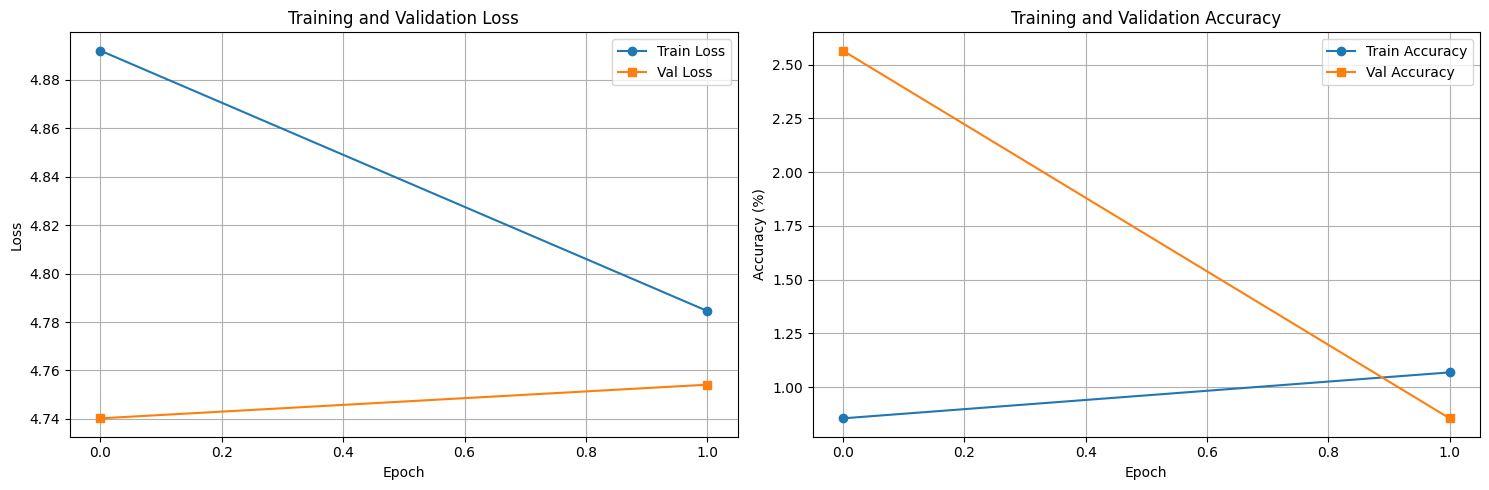


Final Results:
  Best Val Accuracy: 2.56%
  Final Train Accuracy: 1.07%
  Final Val Accuracy: 0.85%


In [20]:
# ============================================================
# VISUALIZE RESULTS
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss curves
axes[0].plot(history['train_loss'], label='Train Loss', marker='o')
axes[0].plot(history['val_loss'], label='Val Loss', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True)

# Accuracy curves
axes[1].plot(history['train_acc'], label='Train Accuracy', marker='o')
axes[1].plot(history['val_acc'], label='Val Accuracy', marker='s')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Results:")
print(f"  Best Val Accuracy: {best_val_acc:.2f}%")
print(f"  Final Train Accuracy: {history['train_acc'][-1]:.2f}%")
print(f"  Final Val Accuracy: {history['val_acc'][-1]:.2f}%")

In [ ]:
# ============================================================
# SAMPLE PREDICTIONS
# ============================================================

# Load best model
checkpoint = torch.load(f"{MODEL_DIR}/best_collection_model.pth", weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Get some validation samples - use sequential indices from the dataset
num_samples = min(12, len(val_dataset))
sample_indices = np.random.choice(len(val_dataset), size=num_samples, replace=False)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

with torch.no_grad():
    for i, idx in enumerate(sample_indices):
        if i >= 12:
            break
        
        # Get prediction using the dataset index
        image, text_feat, label = val_dataset[idx]
        image = image.unsqueeze(0).to(device)
        text_feat = text_feat.unsqueeze(0).to(device)
        
        output = model(image, text_feat)
        _, predicted = output.max(1)
        
        true_collection = label_encoder.inverse_transform([label.item()])[0]
        pred_collection = label_encoder.inverse_transform([predicted.item()])[0]
        
        # Display - get the corresponding row from val_df using the reset index
        row = val_df.iloc[idx]
        if USE_IMAGES and Path(row['image_path']).exists():
            img = Image.open(row['image_path'])
            axes[i].imshow(img)
        else:
            axes[i].text(0.5, 0.5, 'No Image', ha='center', va='center')
        
        color = 'green' if true_collection == pred_collection else 'red'
        axes[i].set_title(f"True: {true_collection}\nPred: {pred_collection}", 
                         color=color, fontsize=10)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL sklearn.preprocessing._label.LabelEncoder was not an allowed global by default. Please use `torch.serialization.add_safe_globals([sklearn.preprocessing._label.LabelEncoder])` or the `torch.serialization.safe_globals([sklearn.preprocessing._label.LabelEncoder])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

# Semi-Supervised Learning: Predict Collections for Unlabeled Products

Now that we have a trained model, let's use it to predict collections for products that don't have a collection assigned yet.

In [ ]:
# ============================================================
# LOAD UNLABELED DATA
# ============================================================

# Load full dataset again
df_full = pd.read_csv(CSV_PATH, sep='\t', low_memory=False)
columns = ['id', 'title', 'link', 'price', 'image_link', 'brand', 'mpn', 
           'gender', 'age_group', 'product_type', 'google_product_category',
           'material', 'color', 'item_group_id', 'collection']
df_full = df_full[columns].copy()

# Split into labeled and unlabeled
df_unlabeled = df_full[df_full['collection'].isna()].copy()
print(f"Total products: {len(df_full):,}")
print(f"Unlabeled products: {len(df_unlabeled):,} ({len(df_unlabeled)/len(df_full)*100:.1f}%)")
print(f"Labeled products used for training: {len(df):,}")

# Create text features for unlabeled data
df_unlabeled['text_features'] = df_unlabeled.apply(create_text_features, axis=1)
unlabeled_text_tfidf = vectorizer.transform(df_unlabeled['text_features'])
print(f"\nUnlabeled text features: {unlabeled_text_tfidf.shape}")

In [ ]:
# ============================================================
# DOWNLOAD IMAGES FOR UNLABELED DATA (Optional - for better predictions)
# ============================================================

DOWNLOAD_UNLABELED_IMAGES = True  # Set to False to skip (faster but text-only predictions)

if USE_IMAGES and DOWNLOAD_UNLABELED_IMAGES:
    print("\nProcessing images for unlabeled data...")
    
    success_count = 0
    for idx, row in tqdm(df_unlabeled.iterrows(), total=len(df_unlabeled), desc='Processing unlabeled images'):
        product_id = row['id']
        
        if on_spark:
            if copy_local_image(product_id):
                success_count += 1
        else:
            image_url = row['image_link']
            if download_http_image(image_url, product_id):
                success_count += 1
    
    print(f"✓ Processed {success_count}/{len(df_unlabeled)} images")
    
    # Add image paths
    df_unlabeled['image_path'] = df_unlabeled['id'].apply(lambda x: str(output_dir / f"{x}.jpg"))
    df_unlabeled['image_exists'] = df_unlabeled['image_path'].apply(lambda x: Path(x).exists())
    print(f"  Images available: {df_unlabeled['image_exists'].sum()}/{len(df_unlabeled)}")
else:
    print("\nSkipping unlabeled image download")
    df_unlabeled['image_path'] = None
    df_unlabeled['image_exists'] = False

In [ ]:
# ============================================================
# PREDICT COLLECTIONS FOR UNLABELED DATA
# ============================================================

# Create dataset for unlabeled data
class UnlabeledDataset(Dataset):
    """Dataset for unlabeled products."""
    
    def __init__(self, df, text_features, transform=None, use_images=True):
        self.df = df.reset_index(drop=True)
        self.text_features = text_features
        self.transform = transform
        self.use_images = use_images
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        # Get text features - handle both sparse matrix and dense array
        if hasattr(self.text_features[idx], 'toarray'):
            # Sparse matrix
            text_feat = torch.FloatTensor(self.text_features[idx].toarray().squeeze())
        else:
            # Dense array
            text_feat = torch.FloatTensor(self.text_features[idx])
        
        # Get image
        if self.use_images and row['image_exists']:
            img_path = row['image_path']
            try:
                image = Image.open(img_path).convert('RGB')
                if self.transform:
                    image = self.transform(image)
            except Exception:
                image = torch.zeros(3, IMG_SIZE, IMG_SIZE)
        else:
            image = torch.zeros(3, IMG_SIZE, IMG_SIZE)
        
        return image, text_feat, idx

# Create dataloader
unlabeled_dataset = UnlabeledDataset(
    df_unlabeled, 
    unlabeled_text_tfidf, 
    val_transform,  # Use validation transform (no augmentation)
    USE_IMAGES and DOWNLOAD_UNLABELED_IMAGES
)
unlabeled_loader = DataLoader(unlabeled_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"✓ Unlabeled dataset created: {len(unlabeled_dataset)} products")

# Make predictions
model.eval()
all_predictions = []
all_probabilities = []

print("\nGenerating predictions...")
with torch.no_grad():
    for images, text_feat, indices in tqdm(unlabeled_loader, desc='Predicting'):
        images = images.to(device)
        text_feat = text_feat.to(device)
        
        outputs = model(images, text_feat)
        probs = torch.softmax(outputs, dim=1)
        
        max_probs, predicted = probs.max(1)
        
        all_predictions.extend(predicted.cpu().numpy())
        all_probabilities.extend(max_probs.cpu().numpy())

# Add predictions to dataframe
df_unlabeled['predicted_collection_encoded'] = all_predictions
df_unlabeled['prediction_confidence'] = all_probabilities
df_unlabeled['predicted_collection'] = label_encoder.inverse_transform(all_predictions)

print(f"✓ Predictions complete!")
print(f"\nPrediction confidence distribution:")
print(f"  Mean confidence: {np.mean(all_probabilities):.3f}")
print(f"  Median confidence: {np.median(all_probabilities):.3f}")
print(f"  High confidence (>0.8): {(np.array(all_probabilities) > 0.8).sum():,} ({(np.array(all_probabilities) > 0.8).sum()/len(all_probabilities)*100:.1f}%)")
print(f"  Medium confidence (0.5-0.8): {((np.array(all_probabilities) >= 0.5) & (np.array(all_probabilities) <= 0.8)).sum():,}")
print(f"  Low confidence (<0.5): {(np.array(all_probabilities) < 0.5).sum():,}")

In [ ]:
# ============================================================
# ANALYZE PREDICTIONS
# ============================================================

# Distribution of predicted collections
print("\nTop 10 predicted collections:")
print(df_unlabeled['predicted_collection'].value_counts().head(10))

# Visualize prediction confidence
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confidence histogram
axes[0, 0].hist(df_unlabeled['prediction_confidence'], bins=50, edgecolor='black')
axes[0, 0].set_xlabel('Prediction Confidence')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Prediction Confidence')
axes[0, 0].axvline(0.8, color='green', linestyle='--', label='High confidence threshold')
axes[0, 0].axvline(0.5, color='orange', linestyle='--', label='Medium confidence threshold')
axes[0, 0].legend()

# Predicted collections distribution
top_predictions = df_unlabeled['predicted_collection'].value_counts().head(20)
axes[0, 1].bar(range(len(top_predictions)), top_predictions.values)
axes[0, 1].set_xlabel('Collection Rank')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Top 20 Predicted Collections')
axes[0, 1].set_xticks(range(len(top_predictions)))
axes[0, 1].set_xticklabels([str(x) for x in top_predictions.index], rotation=90, fontsize=8)

# Confidence by predicted collection
collection_confidence = df_unlabeled.groupby('predicted_collection')['prediction_confidence'].mean().sort_values(ascending=False).head(20)
axes[1, 0].barh(range(len(collection_confidence)), collection_confidence.values)
axes[1, 0].set_yticks(range(len(collection_confidence)))
axes[1, 0].set_yticklabels([str(x) for x in collection_confidence.index], fontsize=8)
axes[1, 0].set_xlabel('Mean Confidence')
axes[1, 0].set_title('Average Confidence by Collection')
axes[1, 0].invert_yaxis()

# High vs low confidence comparison
high_conf = df_unlabeled[df_unlabeled['prediction_confidence'] > 0.8]
low_conf = df_unlabeled[df_unlabeled['prediction_confidence'] < 0.5]
axes[1, 1].bar(['High (>0.8)', 'Medium (0.5-0.8)', 'Low (<0.5)'], 
               [(df_unlabeled['prediction_confidence'] > 0.8).sum(),
                ((df_unlabeled['prediction_confidence'] >= 0.5) & (df_unlabeled['prediction_confidence'] <= 0.8)).sum(),
                (df_unlabeled['prediction_confidence'] < 0.5).sum()],
               color=['green', 'orange', 'red'])
axes[1, 1].set_ylabel('Number of Products')
axes[1, 1].set_title('Confidence Level Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# EXPORT PREDICTIONS
# ============================================================

# Select confidence threshold for export
CONFIDENCE_THRESHOLD = 0.5  # Only export predictions with confidence >= this value

high_confidence_predictions = df_unlabeled[df_unlabeled['prediction_confidence'] >= CONFIDENCE_THRESHOLD].copy()

print(f"\nExporting predictions with confidence >= {CONFIDENCE_THRESHOLD}:")
print(f"  Total predictions: {len(high_confidence_predictions):,} ({len(high_confidence_predictions)/len(df_unlabeled)*100:.1f}%)")

# Create output dataframe
output_df = high_confidence_predictions[['id', 'title', 'predicted_collection', 'prediction_confidence']].copy()
output_df = output_df.sort_values('prediction_confidence', ascending=False)

# Save to CSV
output_path = '/project/data/predicted_collections.csv'
output_df.to_csv(output_path, index=False)
print(f"✓ Saved predictions to: {output_path}")

# Show sample
print(f"\nSample predictions:")
print(output_df.head(20).to_string(index=False))

# Statistics by collection
print(f"\n\nPredictions per collection:")
collection_stats = high_confidence_predictions.groupby('predicted_collection').agg({
    'id': 'count',
    'prediction_confidence': ['mean', 'min', 'max']
}).round(3)
collection_stats.columns = ['Count', 'Mean Conf', 'Min Conf', 'Max Conf']
collection_stats = collection_stats.sort_values('Count', ascending=False)
print(collection_stats.head(20))

## Iterative Semi-Supervised Learning (Optional)

For even better results, you can iteratively refine the model:
1. Add high-confidence predictions to training set
2. Retrain the model with expanded dataset
3. Predict again on remaining unlabeled data
4. Repeat until convergence

This gradually improves the model by using its own confident predictions as additional training data.

In [ ]:
# ============================================================
# ITERATIVE REFINEMENT (OPTIONAL)
# ============================================================

RUN_ITERATIVE_TRAINING = False  # Set to True to enable iterative refinement
REFINEMENT_THRESHOLD = 0.9  # Only add predictions with very high confidence
MAX_ITERATIONS = 3

if RUN_ITERATIVE_TRAINING:
    print("Starting iterative semi-supervised refinement...\n")
    
    # Start with original labeled data
    current_train_df = df.copy()
    iteration_results = []
    
    for iteration in range(MAX_ITERATIONS):
        print(f"=== Iteration {iteration + 1}/{MAX_ITERATIONS} ===")
        
        # Get high-confidence predictions from unlabeled data
        unlabeled_remaining = df_unlabeled[~df_unlabeled['id'].isin(current_train_df['id'])].copy()
        high_conf_new = unlabeled_remaining[
            unlabeled_remaining['prediction_confidence'] >= REFINEMENT_THRESHOLD
        ].copy()
        
        if len(high_conf_new) == 0:
            print("No high-confidence predictions to add. Stopping.")
            break
        
        print(f"Adding {len(high_conf_new)} high-confidence predictions to training set")
        
        # Add to training data
        high_conf_new['collection'] = high_conf_new['predicted_collection']
        high_conf_new['collection_encoded'] = high_conf_new['predicted_collection_encoded']
        current_train_df = pd.concat([current_train_df, high_conf_new], ignore_index=True)
        
        print(f"New training set size: {len(current_train_df):,}")
        
        # Retrain model
        # (Here you would repeat the training process with current_train_df)
        # For now, we'll just track the statistics
        
        iteration_results.append({
            'iteration': iteration + 1,
            'training_samples': len(current_train_df),
            'predictions_added': len(high_conf_new),
            'mean_confidence': high_conf_new['prediction_confidence'].mean()
        })
        
        print(f"  Mean confidence of added samples: {high_conf_new['prediction_confidence'].mean():.3f}")
        print()
    
    # Summary
    print("\n=== Iterative Refinement Summary ===")
    results_df = pd.DataFrame(iteration_results)
    print(results_df.to_string(index=False))
else:
    print("Iterative refinement disabled. Set RUN_ITERATIVE_TRAINING=True to enable.")